<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/ostrowska/regresjaZadanie2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
from numpy import mean, std, absolute
from matplotlib import pyplot

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import cross_val_score, KFold, RepeatedKFold

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, HuberRegressor

from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names)
X = pd.DataFrame(data = housing.data, columns = housing.feature_names)

print(X.head())
y=housing.target

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#liniowa
model1 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', LinearRegression())
])

model1.fit(X_train, y_train)

score1 = model1.score(X_test, y_test)
print("Wynik liniowa:", score1)

Wynik liniowa: 0.5757877060324512


In [16]:
#Wielomianowa 2 Stopnia
model2 = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

# Dopasowanie modelu do danych treningowych
model2.fit(X_train, y_train)

# Ocena modelu na danych testowych
score2 = model2.score(X_test, y_test)
print("Wynik 2:", score2)

Wynik 2: 0.6456819713278688


In [20]:
#Wielomianowa 3 Stopnia
model3 = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('linear', LinearRegression())
])

model3.fit(X_train, y_train)

score3 = model3.score(X_test, y_test)
print("Wynik 3:", score3)



Wynik 3: -17.395619727030436


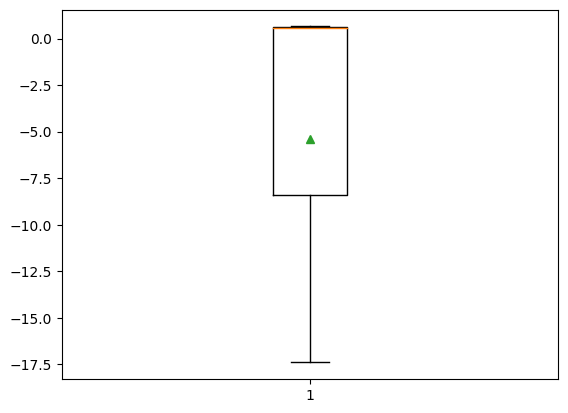

In [19]:
#wykres
pyplot.boxplot([score1,score2,score3], showmeans=True)
pyplot.show()